In [92]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt
import fasttext


df = pd.read_csv('augmented.csv')
# print(df.head(10))
# print(df.columns)
df = df[['Question','Topic']]
df = df[pd.notnull(df['Question'])]
# df.head(10)

labels = list(df['Topic'].unique())

dict_label={}
for label in labels:
    dict_label[label]='__label__'+label.lower().strip().replace(' ','_').replace(',','').replace('&','').replace('-','')

dict_label['Security Issues - terrorism, security, privacy']='__label__security_issues_terrorism_security_privacy'

df['Topic']=df['Topic'].replace(dict_label,value=None)

from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    return text

import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
  
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if word not in stop_words and word.isalpha():
                tokens.append(word)
    return ' '.join(tokens)

df['Question'] = df['Question'].apply(tokenize_text)
df=df[['Topic','Question']]

train, test = train_test_split(df, test_size=0.1, random_state=42)

train.to_csv('train.txt',index=False,sep=' ')
test.to_csv('test.txt',index=False,sep=' ')

model = fasttext.train_supervised('train.txt', wordNgrams = 3, epoch=30, lr=0.0001)

import csv

with open('test.txt') as f:
    csv_reader = csv.reader(f)
    csv_reader = list(csv_reader)[1:]
    for i in csv_reader:
        sent = i[0]
        sent = sent[sent.find('\"'):]
        print(model.predict(sent),sent)

model.test('test.txt')

C:\Users\beert\Anaconda3\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


(('__label__reflective',), array([0.02858145])) "Is excreting globular impoverishment realistic aim"
(('__label__intervention_conflict_and_war',), array([0.02858145])) "How far countries relations others whose human rights record poor"
(('__label__reflective',), array([0.02858144])) "To extent arts society focus local rather foreign talent"
(('__label__science',), array([0.02858147])) "Longer lifespan anticipation creates problems benefits Discuss"
(('__label__crime_and_punishment',), array([0.02858145])) "Should constabulary unlimited powers distribute crime"
(('__label__science',), array([0.02858143])) "Follow possible protect environment many country require increasing total energy progress"
(('__label__the_arts',), array([0.02858143])) "Different Arts writing operating theatre music Mathematics lacks capability creativity How far agree statement"
(('__label__governance',), array([0.02858144])) "In society well follow demand saving environment balanced"
(('__label__governance',), ar

(183, 0.28415300546448086, 0.28415300546448086)

In [93]:
top=["How important is it for young people to be involved in political activism? ",
    "How far is participation in sport encouraged in your society?",
    "Is there any value in doing scientific research if it is not profitable? ",
    "Consider the claim that there should be greater control over social media. ",
    "Assess the view that international efforts are more effective than national efforts in protecting human rights.",
    "To what extent is it necessary for young people to plan for their future? ",
    "‘The death penalty is not justifiable even for the most serious crimes.’ Discuss.",
    "How far do the arts promote change in your society? ",
    "Is it true that the environmental crisis is exaggerated?",
    "Examine the view that companies should be concerned with more than just profit. ",
    "‘A healthier life does not mean a happier life.’ Do you agree? ",
    "‘Museums have no place in today’s world.’ Discuss. "
    ]

for i in top:
    print(i, model.predict(i))

How important is it for young people to be involved in political activism?  (('__label__reflective',), array([0.02858144]))
How far is participation in sport encouraged in your society? (('__label__globalisation',), array([0.02858144]))
Is there any value in doing scientific research if it is not profitable?  (('__label__rights_injustices_and_fair_treatment',), array([0.02858143]))
Consider the claim that there should be greater control over social media.  (('__label__intervention_conflict_and_war',), array([0.02858143]))
Assess the view that international efforts are more effective than national efforts in protecting human rights. (('__label__reading_fiction__stories',), array([0.02858143]))
To what extent is it necessary for young people to plan for their future?  (('__label__family_marriage_youth',), array([0.02858145]))
‘The death penalty is not justifiable even for the most serious crimes.’ Discuss. (('__label__rights_injustices_and_fair_treatment',), array([0.02858143]))
How far 

In [121]:
i='__label__mathematics_and_statistics "How reliable statistics guide planning future"'
i[i.index('"'):]

'"How reliable statistics guide planning future"'

__label__science                                        60
__label__the_arts                                       56
__label__energy_and_the_environment                     52
__label__globalisation                                  52
__label__reflective                                     52
__label__rights_injustices_and_fair_treatment           52
__label__family_marriage_youth                          50
__label__work_and_life                                  50
__label__technology                                     50
__label__medicine_medical_science_and_health            48
__label__security_issues__terrorism_security_privacy    45
__label__leadership                                     45
__label__mass_media                                     45
__label__intervention_conflict_and_war                  44
__label__governance                                     44
__label__economics                                      44
__label__singapore                                      

C:\Users\beert\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


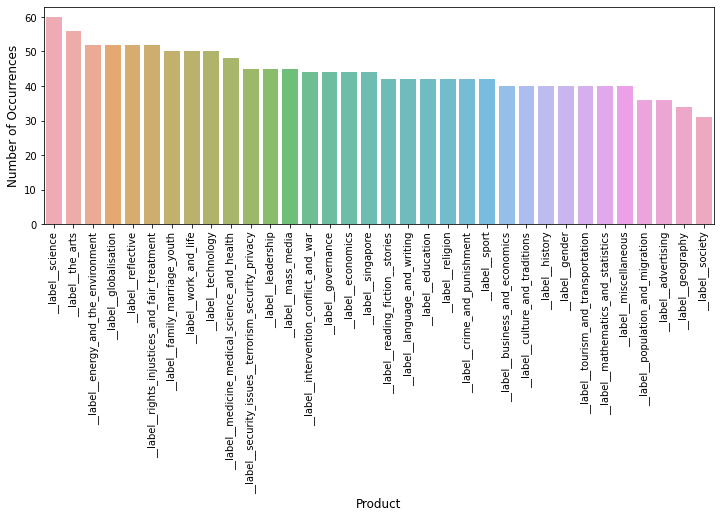

In [76]:
cnt_pro = df['Topic'].value_counts()
print(cnt_pro)
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation=90)
plt.show();

(311, 0.2282958199356913, 0.2282958199356913)

In [37]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    return text
df['Question'] = df['Question'].apply(cleanText)

In [38]:
print(df.head(10))

                                            Question                 Topic
0  rehabilitation, not punishment, should be the ...  crime_and_punishment
1  to what extent is it possible to make the puni...  crime_and_punishment
2  how far can an individual be held responsible ...  crime_and_punishment
3  should crimes that were committed many years a...  crime_and_punishment
4  too much attention is given to criminals; not ...  crime_and_punishment
5  should the police have unlimited powers when d...  crime_and_punishment
6  the quality of written language is being destr...  language_and_writing
7  consider the view that spoken language is more...  language_and_writing
8  is there any value in preserving minority lang...  language_and_writing
9   are certain types of writing superior to others?  language_and_writing


In [ ]:
import gensim.models as g

model="model_folder/doc2vec.bin"  #point to downloaded pre-trained doc2vec model

#load model
m = g.Doc2Vec.load(model)

In [4]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

import nltk
nltk.download('punkt')
nltk.download('stopwords')


from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))
  
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if word not in stop_words and word.isalpha():
                tokens.append(word)
    return tokens

train_tagged = train.apply(lambda r: TaggedDocument(words=tokenize_text(r['Question']), tags=[r.Topic]), axis=1)
test_tagged = test.apply(lambda r: TaggedDocument(words=tokenize_text(r['Question']), tags=[r.Topic]), axis=1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\beert\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\beert\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
[x for x in tqdm(train_tagged.values)]

100%|██████████| 224/224 [00:00<?, ?it/s]


[TaggedDocument(words=['fashion', 'much', 'good', 'thing', 'bad', 'thing', 'extent', 'agree'], tags=['Culture and Traditions']),
 TaggedDocument(words=['consider', 'view', 'take', 'enough', 'responsibility'], tags=['Medicine, Medical Science and Health']),
 TaggedDocument(words=['trade', 'weapons', 'ever', 'justified'], tags=['Security Issues - terrorism, security, privacy']),
 TaggedDocument(words=['extent', 'newspapers', 'magazines', 'read', 'deal', 'trivial', 'rather', 'important'], tags=['Mass Media']),
 TaggedDocument(words=['extent', 'people', 'judged', 'physical', 'appearance', 'abilities'], tags=['Miscellaneous']),
 TaggedDocument(words=['love', 'one', 'country', 'still', 'encouraged'], tags=['Globalisation']),
 TaggedDocument(words=['consider', 'view', 'work', 'days', 'could', 'done', 'home'], tags=['Work and Life']),
 TaggedDocument(words=['businesses', 'positive', 'negative', 'impact', 'society'], tags=['Business and Economics']),
 TaggedDocument(words=['human', 'need', 'rat

In [12]:
import multiprocessing
cores = multiprocessing.cpu_count()

model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=1, alpha=0.065, min_alpha=0.065, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])
print(model_dbow)

100%|██████████| 224/224 [00:00<00:00, 224230.09it/s]

Doc2Vec(dbow,d300,n5,s0.001,t8)


In [13]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 224/224 [00:00<?, ?it/s]


Wall time: 438 ms


In [14]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors


In [18]:
preloaded_model="doc2vec.bin"  #point to downloaded pre-trained doc2vec model

#load model
model_dbow = Doc2Vec.load(preloaded_model)

AttributeError: Can't get attribute 'DocvecsArray' on <module 'gensim.models.doc2vec' from 'C:\\Users\\beert\\Anaconda3\\lib\\site-packages\\gensim\\models\\doc2vec.py'>

In [9]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5, max_iter = 10000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))


Testing accuracy 0.03125
Testing F1 score: 0.03253968253968254


In [27]:
word=input('Enter a word')
l=len(word)
i=0

while i<=(l//2)-1:
    if word[i] != word[l-i-1]:
        print(f'{word} not a palindrome')
        break
    i += 1


233311 not a palindrome
233311 is a palindrome


In [26]:
from sklearn.neighbors import KNeighborsClassifier

y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
knn_clf=KNeighborsClassifier()

knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.08333333333333333
Testing F1 score: 0.04979395604395604


In [33]:
print(X_test,y_test)

(array([-1.3517129e-03,  1.4888922e-03,  9.1987493e-04,  5.5404822e-04,
        8.6770672e-04, -2.9207757e-04, -6.7679299e-04, -1.3059456e-03,
        1.1084077e-03,  1.1188933e-03,  4.3714463e-04, -4.7489762e-04,
        3.7252504e-04,  3.9542338e-04,  1.8950840e-04,  1.0037723e-03,
       -1.7428240e-04,  4.6086530e-04, -2.7133228e-04, -4.4386080e-04,
       -5.1510794e-04, -7.7282789e-04, -6.4456096e-04, -1.6166846e-03,
        5.7101052e-04,  1.2824583e-03, -5.6145457e-04, -8.9348752e-05,
       -3.4644039e-04,  3.6969662e-04, -2.1423290e-04, -1.3746205e-03,
        1.1786342e-04,  1.6571035e-03,  1.2356768e-03,  1.1612793e-04,
        8.2550250e-04, -1.4692517e-03,  1.5057868e-03, -1.6834021e-04,
       -9.0036768e-04,  2.5073488e-05, -1.4980912e-04,  8.2055869e-04,
        1.5785726e-03, -7.1408867e-04, -6.6675316e-04,  1.0651950e-03,
        9.2972280e-04, -1.5886342e-03,  3.2948513e-04, -1.0557628e-03,
       -1.7378162e-04,  1.0431272e-03,  1.3520074e-03,  3.4853219e-05,
     

In [32]:
import nlpaug
import nlpaug.augmenter.word as naw
import nltk
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

aug = naw.SynonymAug(aug_src='wordnet')

df = pd.read_csv('Question_Year_QNumber_Topic.csv')

for row in df[df.Topic=='Advertising'].itertuples():
    text=row[1]
    print(text,aug.augment(text))

text = 'The quick brown fox jumps over the lazy dog .'

augmented_text = aug.augment(text)
print("Original:")
print(text)
print("Augmented Text:")
print(augmented_text)

There is no such thing as bad publicity. To what extent is this true? There be no such thing as bad publicity. To what extent is this genuine?
Advertisements are often entertaining, but they rarely affect consumer choice. Is this your experience? Advertisement are often entertaining, but they seldom affect consumer option. Is this your experience?
Advertising encourages a desire for products which people do not actually need. Discuss. Advertising encourages a desire for products which hoi polloi execute not actually need. Discus.
Original:
The quick brown fox jumps over the lazy dog .
Augmented Text:
The straightaway brown university fox jumps ended the lazy dog.


In [13]:
print(df)

                             Topic  \
0    __label__crime_and_punishment   
1    __label__crime_and_punishment   
2    __label__crime_and_punishment   
3    __label__crime_and_punishment   
4    __label__crime_and_punishment   
..                             ...   
315         __label__miscellaneous   
316         __label__miscellaneous   
317         __label__miscellaneous   
318         __label__miscellaneous   
319         __label__miscellaneous   

                                              Question  
0    Rehabilitation punishment purpose justice syst...  
1         To extent possible make punishment fit crime  
2    How far individual held responsible crimes hum...  
3    Should crimes committed many years ago simply ...  
4    Too much attention given criminals enough vict...  
..                                                 ...  
315  To extent people judged physical appearance ab...  
316              Is point trying predict future trends  
317                           

In [20]:
df = pd.read_csv('Question_Year_QNumber_Topic.csv')
# print(df.head(10))
# print(df.columns)
df = df[['Question','Topic']]
df = df[pd.notnull(df['Question'])]
# df.head(10)

labels = list(df['Topic'].unique())

dict_label={}
for label in labels:
    dict_label[label]='__label__'+label.lower().strip().replace(' ','_').replace(',','').replace('&','').replace('-','')

dict_label['Security Issues - terrorism, security, privacy']='__label__security_issues_terrorism_security_privacy'

df['Topic']=df['Topic'].replace(dict_label,value=None)

from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    return text

import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
  
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if word not in stop_words and word.isalpha():
                tokens.append(word)
    return ' '.join(tokens)

df['Question'] = df['Question'].apply(tokenize_text)

labels = list(df['Topic'].unique())

print(labels)

['__label__crime_and_punishment', '__label__language_and_writing', '__label__reading_fiction__stories', '__label__the_arts', '__label__culture_and_traditions', '__label__education', '__label__economics', '__label__business_and_economics', '__label__energy_and_the_environment', '__label__family_marriage_youth', '__label__gender', '__label__population_and_migration', '__label__globalisation', '__label__governance', '__label__leadership', '__label__intervention_conflict_and_war', '__label__security_issues_terrorism_security_privacy', '__label__history', '__label__geography', '__label__tourism_and_transportation', '__label__mathematics_and_statistics', '__label__mass_media', '__label__advertising', '__label__religion', '__label__science', '__label__technology', '__label__medicine_medical_science_and_health', '__label__sport', '__label__rights_injustices_and_fair_treatment', '__label__reflective', '__label__work_and_life', '__label__singapore', '__label__society', '__label__miscellaneous']


In [85]:
print(list(df.Topic.value_counts()))

import nlpaug
import nlpaug.augmenter.word as naw
import nltk
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

aug = naw.SynonymAug(aug_src='wordnet')

df = pd.read_csv('Question_Year_QNumber_Topic.csv')

with open('augmented_text.txt','w+') as f:
    topic_list = list(df.Topic.unique())
    topic_list.remove('Society')
    max_topic = max(df.Topic.value_counts())
    topic_count = df.Topic.value_counts().to_dict()
    for topic in topic_list:
        for row in df[df.Topic==topic].itertuples():
            for i in range(max_topic//topic_count[topic]+2):
                text=row[1]
                f.writelines(f'"{aug.augment(text)}", {topic}\n')


[60, 56, 52, 52, 52, 52, 50, 50, 50, 48, 45, 45, 45, 44, 44, 44, 44, 42, 42, 42, 42, 42, 42, 40, 40, 40, 40, 40, 40, 40, 36, 36, 34, 31]


In [68]:
list(df.Topic.unique())

['Crime and Punishment',
 'Language and Writing',
 'Reading, Fiction & Stories',
 'The Arts ',
 'Culture and Traditions',
 'Education',
 'Economics',
 'Business and Economics',
 'Energy and the Environment',
 'Family, Marriage, Youth ',
 'Gender',
 'Population and Migration',
 'Globalisation',
 'Governance',
 'Leadership',
 'Intervention, conflict and war',
 'Security Issues - terrorism, security, privacy',
 'History ',
 'Geography',
 'Tourism and Transportation',
 'Mathematics and Statistics',
 'Mass Media',
 'Advertising',
 'Religion',
 'Science',
 'Technology',
 'Medicine, Medical Science and Health',
 'Sport',
 'Rights, Injustices and Fair Treatment',
 'Reflective',
 'Work and Life',
 'Singapore',
 'Society',
 'Miscellaneous']

In [49]:
df.Topic.groupby("Advertising").count()

KeyError: 'Advertising'

In [51]:
df.Topic.value_counts().to_dict()

{'Society': 31,
 'Science': 15,
 'The Arts ': 14,
 'Rights, Injustices and Fair Treatment': 13,
 'Globalisation': 13,
 'Energy and the Environment': 13,
 'Reflective': 13,
 'Medicine, Medical Science and Health': 12,
 'Governance': 11,
 'Singapore': 11,
 'Economics': 11,
 'Intervention, conflict and war': 11,
 'Family, Marriage, Youth ': 10,
 'Technology': 10,
 'Work and Life': 10,
 'Security Issues - terrorism, security, privacy': 9,
 'Mass Media': 9,
 'Leadership': 9,
 'Mathematics and Statistics': 8,
 'Business and Economics': 8,
 'Culture and Traditions': 8,
 'History ': 8,
 'Religion': 7,
 'Reading, Fiction & Stories': 7,
 'Language and Writing': 7,
 'Education': 7,
 'Sport': 6,
 'Crime and Punishment': 6,
 'Tourism and Transportation': 5,
 'Gender': 5,
 'Miscellaneous': 5,
 'Advertising': 3,
 'Population and Migration': 3,
 'Geography': 2}